## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [3]:
data = pd.read_csv('dataset.csv')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
data.shape

(550068, 12)

In [5]:
data.describe(include = 'object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [6]:
for x in data.describe(include = 'object').columns:
    print(x)
    print(data[x].unique())

Product_ID
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender
['F' 'M']
Age
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category
['A' 'C' 'B']
Stay_In_Current_City_Years
['2' '4+' '3' '1' '0']


In [7]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Explore missing values

In [9]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

#### 1. drop null values from product_category_2 column
#### 2. delete product_category_3 column from the table because it has too much null values

In [4]:
data.drop(['Product_Category_3'], axis=1,inplace=True)
data.dropna(inplace=True)

In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,3.764300e+05,376430.000000,376430.000000,376430.000000,376430.000000,376430.000000
mean,1.003034e+06,8.118399,0.406309,4.238793,9.842329,10069.020833
std,1.730669e+03,6.504850,0.491144,3.289190,5.086590,5186.631291
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,185.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,6105.000000
50%,1.003084e+06,7.000000,0.000000,4.000000,9.000000,8775.000000
75%,1.004482e+06,14.000000,1.000000,6.000000,15.000000,15190.000000
max,1.006040e+06,20.000000,1.000000,15.000000,18.000000,23961.000000


## Checking outliers

C:\Users\Horus\AppData\Local\Temp\ipykernel_12532\1680743795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Purchase, label='Purchase', kde=True, bins=10, color='green')


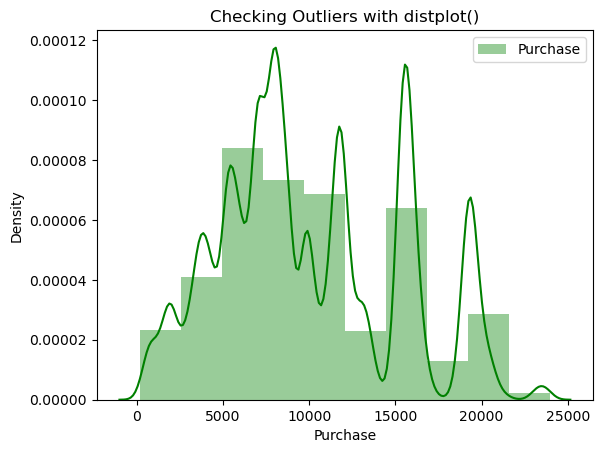

In [12]:
sns.color_palette("pastel")
plt.title('Checking Outliers with distplot()')
sns.distplot(data.Purchase, label='Purchase', kde=True, bins=10, color='green')
plt.legend()

#### I think this outliers represent natural variations in the population 
#### so they should be left in my dataset

## Correlation of Data 

C:\Users\Horus\AppData\Local\Temp\ipykernel_12532\1294251879.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


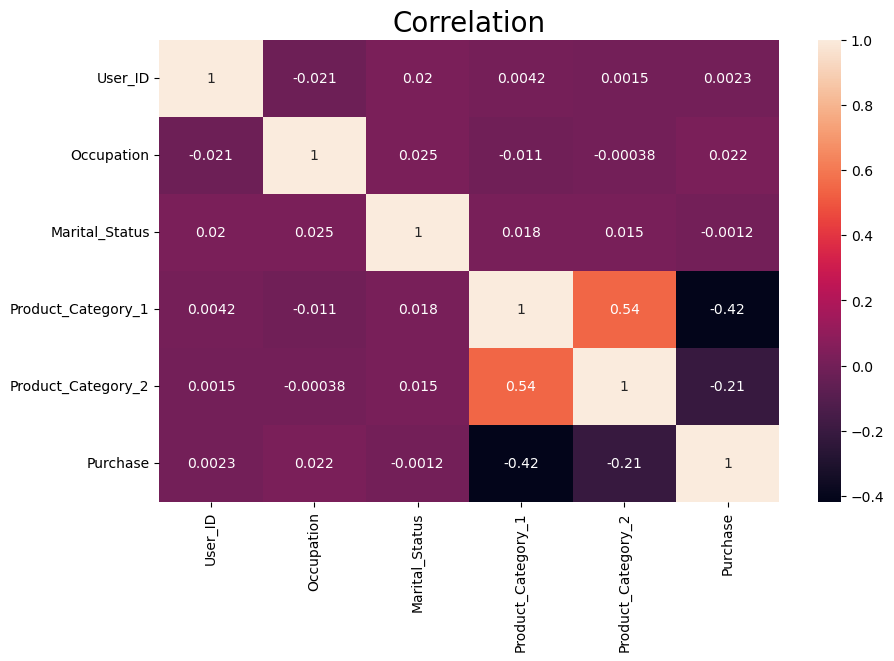

In [14]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot = True)
plt.title("Correlation", fontsize = 20);

## EDA

### Which gender buys more? 

<Axes: ylabel='Gender'>

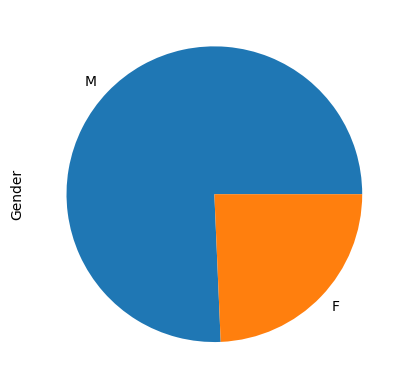

In [16]:
data['Gender'].value_counts().plot(kind='pie')

## Gender vs Purchase 

<Axes: xlabel='Gender'>

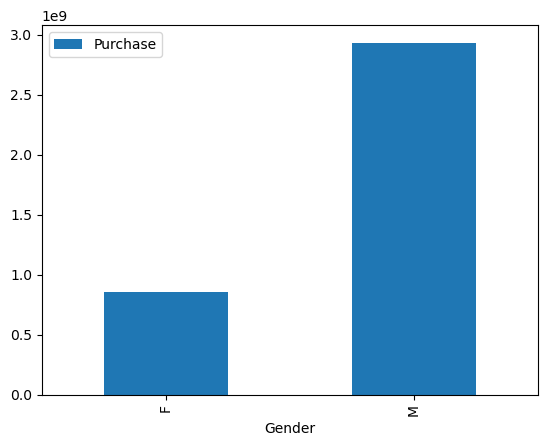

In [37]:
data.groupby('Gender')[['Purchase']].sum().plot(kind='bar')

### Count Of Age 

<BarContainer object of 7 artists>

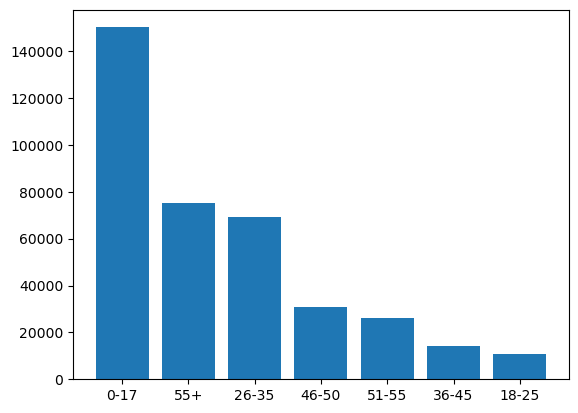

In [20]:
plt.bar(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],data['Age'].value_counts())

<Axes: xlabel='Age'>

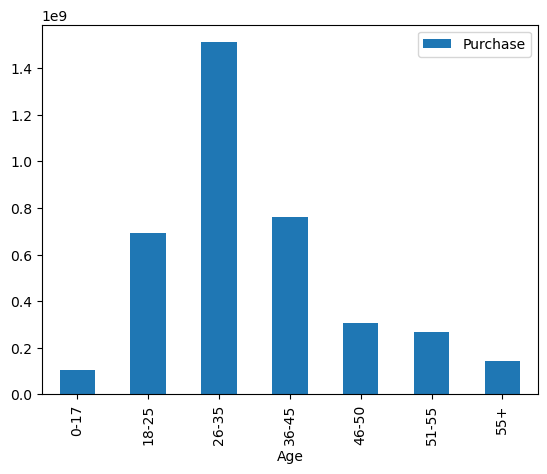

In [40]:
data.groupby('Age')[['Purchase']].sum().plot(kind='bar')

## Occupation vs Purchased

<Axes: ylabel='Occupation'>

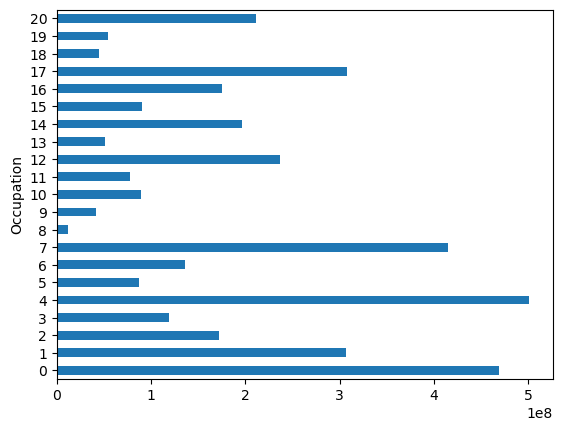

In [48]:
data.groupby('Occupation')['Purchase'].sum().plot(kind = 'barh')

## Count City Category 

In [6]:
data['City_Category'].value_counts()

B    157683
C    120386
A     98361
Name: City_Category, dtype: int64

<Axes: >

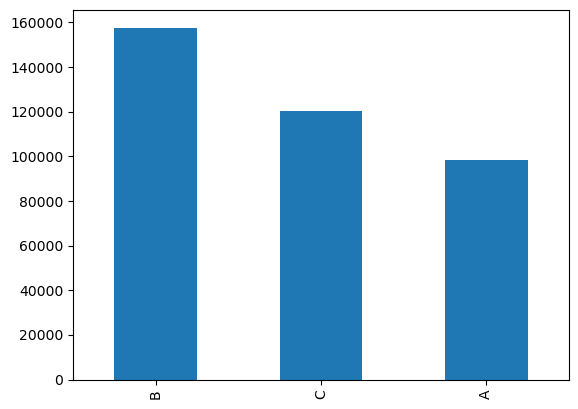

In [7]:
data['City_Category'].value_counts().plot(kind='bar')

In [11]:
data.groupby('City_Category')[['Purchase']].sum()

,Purchase
City_Category,
A,947890129
B,1564584491
C,1277806892


<Axes: xlabel='City_Category'>

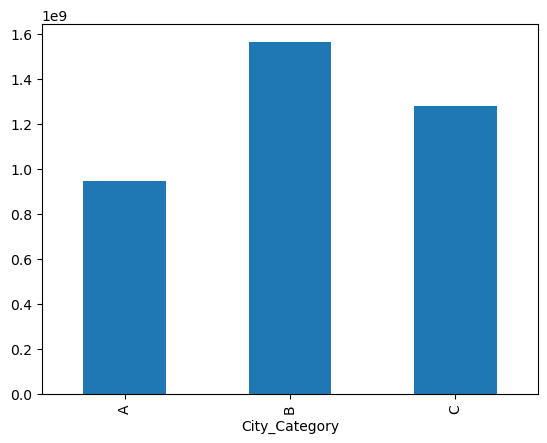

In [9]:
data.groupby('City_Category')['Purchase'].sum().plot(kind='bar')

## How does marital status affect purchases

<Axes: >

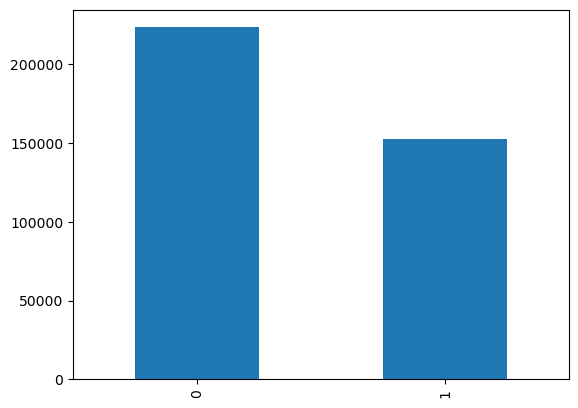

In [13]:
data['Marital_Status'].value_counts().plot(kind='bar')

<Axes: xlabel='Marital_Status'>

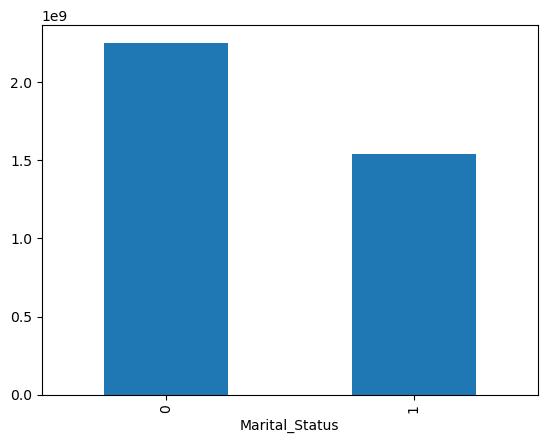

In [15]:
data.groupby('Marital_Status')['Purchase'].sum().plot(kind='bar')

## Product category 1,2 vs Purchase

<Axes: xlabel='Product_Category_1'>

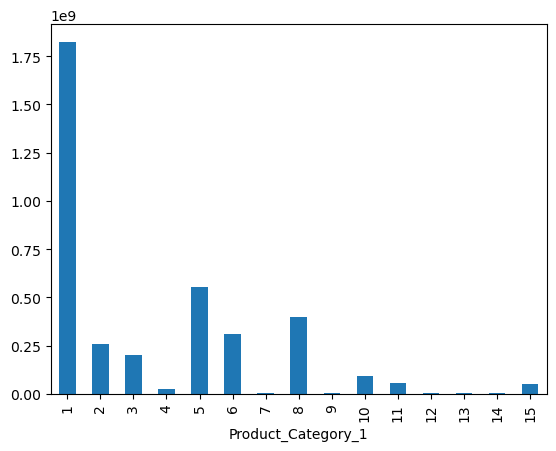

In [16]:
data.groupby('Product_Category_1')['Purchase'].sum().plot(kind='bar')

<Axes: xlabel='Product_Category_2'>

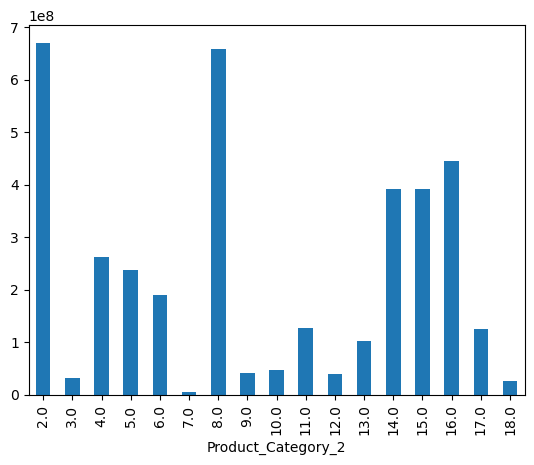

In [17]:
data.groupby('Product_Category_2')['Purchase'].sum().plot(kind='bar')

## Top 10 users

In [23]:
data.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False).head(10)

User_ID
1004277    6518353
1001680    5396341
1002909    5347704
1004448    4886216
1001941    4672695
1003032    4452889
1000424    4381764
1000549    4290049
1001181    4269014
1003539    4259919
Name: Purchase, dtype: int64

## Top 10 Products

In [27]:
data.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head(10)

Product_ID
P00025442    27995166
P00110742    26722309
P00059442    24338343
P00184942    24334887
P00112142    24216006
P00110942    23639564
P00237542    23425576
P00057642    23102780
P00010742    22164153
P00110842    21390722
Name: Purchase, dtype: int64